### Implementing A Star Algorithm to find the shortest path when barriers exist
#### The question is provided by Sebastian Lague from Youtube

In [2]:
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
%matplotlib inline

In [6]:
#The graphical representation of problem starts in 3:00
YouTubeVideo('/-L-WgKMFuhE?t=180')

In [2]:
class AStarGraph(object):
    #Define a class board like grid with two barriers

    def __init__(self):
        self.barriers = [(1,3),(2,3),(2,4),(2,5),(2,6),(2,7)]

    def heuristic(self, start, goal):
        #Uses Euclidean Distance as heuristic
        diag = min(goal[1]-start[1],goal[0]-start[0])
        straight = max(goal[1]-start[1],goal[0]-start[0])
        return (14*diag + 10*straight)

    def get_vertex_neighbours(self, pos):
        n = []
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1),(1,1),(-1,1),(1,-1),(-1,-1)]:
            x2 = pos[0] + dx
            y2 = pos[1] + dy
            if x2 < 0 or x2 > 5 or y2 < 0 or y2 > 10 or (x2,y2) in self.barriers:
                continue
            n.append((x2, y2))
        return n

    def move_cost(self, a, b):
        if abs(a[0]-b[0])+abs((a[1]-b[1])) == 1 :
            cost = 10
        else :
            cost = 14
        return cost

In [3]:
 def AStarSearch(start, end, graph):

    G = {} #Actual movement cost to each position from the start position
    F = {} #Estimated movement cost of start to end

    #Initialize starting values
    G[start] = 0 
    F[start] = graph.heuristic(start, end)

    closed_list = set()
    open_list = set([start])
    cameFrom = {}

    while len(open_list) > 0:
        #Get the vertex in the open list with the lowest F score
        current = None
        currentFscore = None
        for pos in open_list:
            if current is None or F[pos] < currentFscore:
                currentFscore = F[pos]
                current = pos

        #Check if we have reached the goal
        if current == end:
            #Retrace our route backward
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path, F[end] 

        #Mark the current vertex as closed
        open_list.remove(current)
        closed_list.add(current)

        #Update scores for vertices near the current position
        for neighbour in graph.get_vertex_neighbours(current):
            if neighbour in closed_list: 
                continue #We have already processed this node exhaustively
            candidateG = G[current] + graph.move_cost(current, neighbour)

            if neighbour not in open_list:
                open_list.add(neighbour) #Discovered a new vertex
            elif candidateG >= G[neighbour]:
                continue #This G score is worse than previously found

            #Adopt this G score
            cameFrom[neighbour] = current
            G[neighbour] = candidateG
            H = graph.heuristic(neighbour, end)
            F[neighbour] = G[neighbour] + H

    raise RuntimeError("A* failed to find a solution")
    


In [4]:
graph = AStarGraph()

In [5]:
result = AStarSearch((4,7),(1,4),graph)

route [(4, 7), (3, 8), (2, 8), (1, 7), (1, 6), (1, 5), (1, 4)]
cost 68


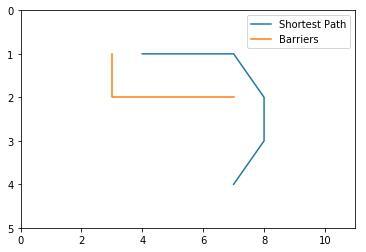

In [8]:
result, cost = AStarSearch((4,7),(1,4), graph)
print ("route", result)
print ("cost", cost)
plt.plot([v[1] for v in result], [v[0] for v in result],label='Shortest Path')
plt.plot([v[1] for v in graph.barriers], [v[0] for v in graph.barriers], label='Barriers')
plt.xlim(0,11)
plt.ylim(5,0)
plt.legend(loc='best')
plt.show()

In [33]:
result

[(4, 7), (3, 8), (2, 8), (1, 7), (1, 6), (1, 5), (1, 4)]

In [30]:
graph.barriers

[(1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]